**Project 1: Credit Card Fraud Detection**

data source: https://www.kaggle.com/mishra5001/credit-card

In [543]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import sklearn

In [560]:
data = pd.read_csv('application_data.csv')
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
data.shape

(307511, 122)

In [159]:
data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [160]:
data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

**The Target Variable**

In [533]:
# number of defaults and non-defaults

default = data[data.TARGET==1]
non_default = data[data.TARGET==0]

print(default.shape)
print(non_default.shape)

# or
print(data.TARGET.sum())

(24825, 123)
(282686, 123)
24825


In [534]:
# proportion of defaults
percent_default = len(default) / len(data) * 100
print('Percentage of defaults:', round(percent_default, 2), '%')

# proportion of non-defaults
percent_non_default = len(non_default) / len(data) * 100
print('Percentage of non-defaults:', round(percent_non_default, 2), '%')

Percentage of defaults: 8.07 %
Percentage of non-defaults: 91.93 %


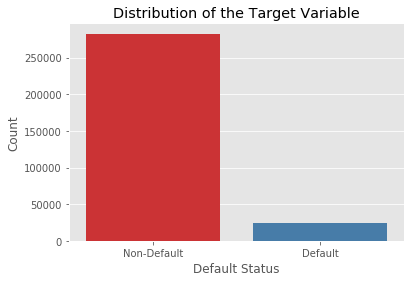

In [395]:
# distribution of defaults and non-defaults
default_status = sns.countplot(x='TARGET', data=data)
plt.xlabel('Default Status')
plt.ylabel('Count')
default_status.set_xticklabels(['Non-Default', 'Default'])
plt.title('Distribution of the Target Variable')
plt.show()

Percentage of defaults: 8.07 %
Percentage of non-defaults: 91.93 %



**Missing Values**

In [165]:
total_na = data.isnull().sum()
total_na

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [562]:
percent_na = (total_na / data.isnull().count()) * 100

data_concat = pd.concat([total_na, percent_na], axis=1, keys=['Total NA', 'Percent NA'])
sorted_data = data_concat.sort_values(by='Percent NA', ascending=False)
sorted_data.head(10)

,Total NA,Percent NA
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


In [167]:
# dropping columns with high missing values (threshold of 60 % ?)

# drop_cols = sorted_data[sorted_data['Percent NA'] >= 60]
# print(drop_cols)

# new_sorted_data = sorted_data.drop(drop_cols)
# why didn't work?

In [168]:
# dropping columns with high missing values (threshold of 33 % ?)
missing_cols = percent_na[percent_na >= 33].index
data.drop(missing_cols, axis=1, inplace=True)

In [169]:
data.shape

(307511, 73)

In [170]:
list(data.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_

In [178]:
data.loc[:, data.isnull().any()]

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,24700.5,351000.0,Unaccompanied,Laborers,1.0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,35698.5,1129500.0,Family,Core staff,2.0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6750.0,135000.0,Unaccompanied,Laborers,1.0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29686.5,297000.0,Unaccompanied,Laborers,2.0,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,Unaccompanied,Core staff,1.0,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,27558.0,225000.0,Unaccompanied,Sales staff,1.0,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,12001.5,225000.0,Unaccompanied,NaN,1.0,0.115992,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,29979.0,585000.0,Unaccompanied,Managers,1.0,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,20205.0,319500.0,Unaccompanied,Laborers,2.0,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [185]:
data['AMT_ANNUITY'].fillna(data['AMT_ANNUITY'].mean(), inplace=True)
data['AMT_GOODS_PRICE'].fillna(data['AMT_GOODS_PRICE'].mean(), inplace=True)
data['CNT_FAM_MEMBERS'].fillna(data['CNT_FAM_MEMBERS'].mean(), inplace=True)
data['EXT_SOURCE_2'].fillna(data['EXT_SOURCE_2'].mean(), inplace=True)
data['EXT_SOURCE_3'].fillna(data['EXT_SOURCE_3'].mean(), inplace=True)
data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(data['OBS_30_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(data['DEF_30_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(data['OBS_60_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(data['DEF_60_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
data['DAYS_LAST_PHONE_CHANGE'].fillna(data['DAYS_LAST_PHONE_CHANGE'].mean(), inplace=True)
data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(data['AMT_REQ_CREDIT_BUREAU_HOUR'].mean(), inplace=True)
data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(data['AMT_REQ_CREDIT_BUREAU_DAY'].mean(), inplace=True)
data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(data['AMT_REQ_CREDIT_BUREAU_WEEK'].mean(), inplace=True)
data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(data['AMT_REQ_CREDIT_BUREAU_MON'].mean(), inplace=True)
data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(data['AMT_REQ_CREDIT_BUREAU_QRT'].mean(), inplace=True)
data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(data['AMT_REQ_CREDIT_BUREAU_YEAR'].mean(), inplace=True)


In [ ]:
for col_name in data:
    data['col_name'].fillna(data['col_na'].mean(), inplace=True)

In [186]:
data.loc[:, data.isnull().any()]

,NAME_TYPE_SUITE,OCCUPATION_TYPE
0,Unaccompanied,Laborers
1,Family,Core staff
2,Unaccompanied,Laborers
3,Unaccompanied,Laborers
4,Unaccompanied,Core staff
...,...,...
307506,Unaccompanied,Sales staff
307507,Unaccompanied,NaN
307508,Unaccompanied,Managers
307509,Unaccompanied,Laborers


In [188]:
data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [190]:
# replacing NA values in NAME_TYPE_SUITE with random elements from the column
suite_list = ['Unaccompanied','Family','Spouse, partner', 'Children','Other_B', 'Other_A', 'Group of people']
data['NAME_TYPE_SUITE'] = data['NAME_TYPE_SUITE'].fillna(pd.Series(np.random.choice(suite_list, size=len(data.index))))
# Series? # size? # .index?

In [193]:
data.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [222]:
# replacing NA values in OCCUPATION_TYPE with random elements from the column

occupation_list = np.unique(list(data['OCCUPATION_TYPE']))

# removing 'nan' from the list ?
#occupation_list_pd = pd.DataFrame(occupation_list, columns=['OCCUPATION_TYPE'])
#occ_list = occupation_list_pd.loc[occupation_list_pd['OCCUPATION_TYPE'] != 'nan']
# occupation_list is an ndarray - how to take out 'nan' from the array?

occ_type_list = ['Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff',
       'Drivers', 'HR staff', 'High skill tech staff', 'IT staff',
       'Laborers', 'Low-skill Laborers', 'Managers', 'Medicine staff',
       'Private service staff', 'Realty agents', 'Sales staff',
       'Secretaries', 'Security staff', 'Waiters/barmen staff']

data['OCCUPATION_TYPE'] = data['OCCUPATION_TYPE'].fillna(pd.Series(np.random.choice(occ_type_list, size=len(data.index))))

In [223]:
data.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 73, dtype: int64

**Looking at some columns that might better explain the target variable:**

**Gender**

In [75]:
# gender
data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [90]:
print(default['CODE_GENDER'].value_counts())

F    14170
M    10655
Name: CODE_GENDER, dtype: int64


In [91]:
# male_default = default[default.CODE_GENDER == 'M']
# male_default_proportion = (len(male_default) / len(default)) * 100
# print('male default:', male_default_proportion, '%')

# female_default = default[default.CODE_GENDER == 'F']
# female_default_proportion = (len(female_default) / len(default)) * 100
# print('female default:', female_default_proportion, '%')

In [92]:
# total_male_percent = (len(data[data.CODE_GENDER == 'M']) / len(data)) * 100
# print('total male population:', total_male_percent, '%')

# total_female_percent = (len(data[data.CODE_GENDER == 'F']) / len(data)) * 100
# print('total female population:', total_female_percent, '%')

In [93]:
# print(total_female_percent / total_male_percent)
# print(female_default_proportion / male_default_proportion)

# female population is 1.93 times greater than male population, but female default is 1.33 times greater
# than male default, meaning female default is less than male default overall

In [99]:
male = data[data.CODE_GENDER == 'M']
male_default = default[default.CODE_GENDER == 'M']
male_default_percent = (len(male_default) / len(male)) * 100
print('male default:', round(male_default_percent,2), '%')

female = data[data.CODE_GENDER == 'F']
female_default = default[default.CODE_GENDER == 'F']
female_default_percent = (len(female_default) / len(female)) * 100
print('female default:', round(female_default_percent,2), '%')

male default: 10.14 %
female default: 7.0 %


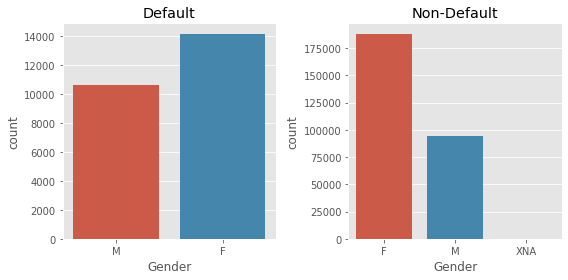

In [554]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(8,4))
sns.countplot(ax=ax1, x='CODE_GENDER', data=default)
sns.countplot(ax=ax2, x='CODE_GENDER', data=non_default)
ax1.set_xlabel('Gender')
ax2.set_xlabel('Gender')
ax1.set_title('Default')
ax2.set_title('Non-Default')
plt.tight_layout()

# number of females taking loan is higher than number of males

**Age**

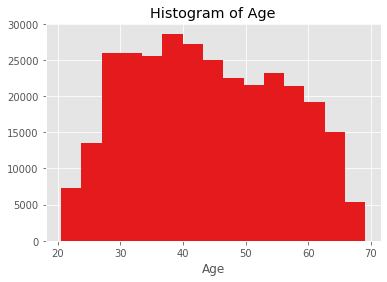

In [465]:
data['AGE'] = data['DAYS_BIRTH'] / -365
plt.hist(data['AGE'], bins=15)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.show()

# normally ditributed

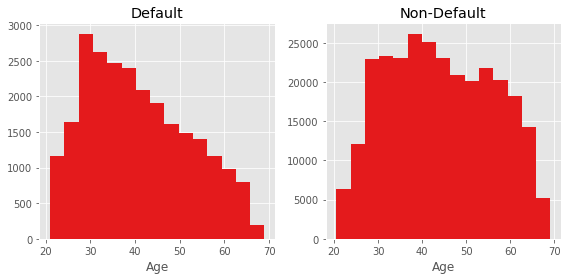

In [459]:
# comparing the age distribution for default and non-default groups

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))

#sns.histplot(ax=ax1, x='AGE', data=default, bins=15)
#sns.histplot(ax=ax2, x='AGE', data=non_default, bins=15)

ax1.hist(x='AGE', data=default, bins=15)
ax2.hist(x='AGE', data=non_default, bins=15)
ax1.set_xlabel('Age')
ax2.set_xlabel('Age')
ax1.set_title('Default')
ax2.set_title('Non-Default')
plt.tight_layout()
plt.show()


**Income**

In [100]:
# income
data['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [396]:
# dividing the sample into two groups by income (below the mean and above the mean)

half_low_income = data[data.AMT_INCOME_TOTAL < data.AMT_INCOME_TOTAL.mean()]
half_high_income = data[data.AMT_INCOME_TOTAL >= data.AMT_INCOME_TOTAL.mean()]

low_income_default = data[(data.TARGET == 1) & (data.AMT_INCOME_TOTAL < data.AMT_INCOME_TOTAL.mean())]
high_income_default = data[(data.TARGET == 1) & (data.AMT_INCOME_TOTAL >= data.AMT_INCOME_TOTAL.mean())]

low_income_default_percent = (len(low_income_default) / len(half_low_income)) * 100
high_income_default_percent = (len(high_income_default) / len(half_high_income)) * 100

print('low income default:', low_income_default_percent, '%')
print('high income default:', high_income_default_percent, '%')

low income default: 8.479974350068133 %
high income default: 7.44002126669768 %


In [224]:
# defining low and high income using 1st and 3rd quantiles

low_income = data[data.AMT_INCOME_TOTAL < data.AMT_INCOME_TOTAL.quantile(0.25)]
high_income = data[data.AMT_INCOME_TOTAL >= data.AMT_INCOME_TOTAL.quantile(0.75)]

low_income_default = data[(data.TARGET == 1) & (data.AMT_INCOME_TOTAL < data.AMT_INCOME_TOTAL.quantile(0.25))]
high_income_default = data[(data.TARGET == 1) & (data.AMT_INCOME_TOTAL > data.AMT_INCOME_TOTAL.quantile(0.75))]

low_income_default_percent = (len(low_income_default) / len(low_income)) * 100
high_income_default_percent = (len(high_income_default) / len(high_income)) * 100

print('low income default:', low_income_default_percent, '%')
print('high income default:', high_income_default_percent, '%')

# loan default is higher among low income population

low income default: 8.22754783708794 %
high income default: 5.624779526394247 %


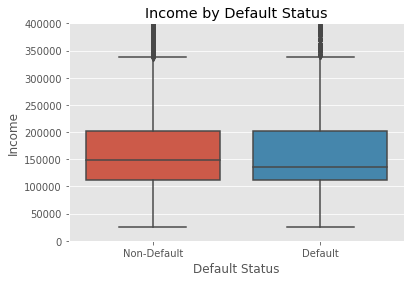

In [555]:
income = sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=data)
plt.title('Income by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Income')
income.set_xticklabels(['Non-Default', 'Default'])
plt.ylim([0,400000])
plt.show()

In [556]:
#data.groupby(['NAME_CONTRACT_TYPE', 'TARGET']).size().reset_index(name='COUNT')

In [557]:
# Contract Type
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
# sns.countplot(ax=ax1, x='NAME_CONTRACT_TYPE', data=default)
# sns.countplot(ax=ax2, x='NAME_CONTRACT_TYPE', data=non_default)
# ax1.set_xlabel('Contract Type')
# ax2.set_xlabel('Contract Type')
# ax1.set_title('Default')
# ax2.set_title('Non-Default')
# plt.tight_layout()

In [558]:
# cont_type = sns.catplot('TARGET', hue='NAME_CONTRACT_TYPE', data=data, kind='count')
# cont_type.set_axis_labels('Default Status', 'Count')
# cont_type.set_xticklabels(['Non-Default', 'Default'])

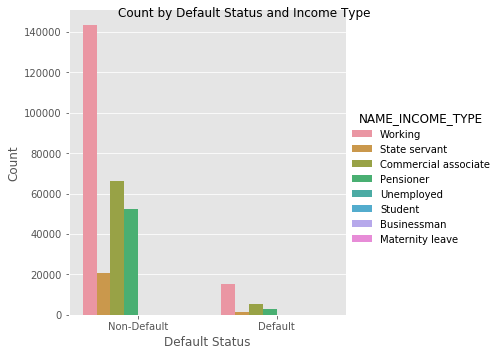

In [260]:
# Income Type
inc_type = sns.catplot('TARGET', hue='NAME_INCOME_TYPE', data=data, kind='count')
inc_type.fig.suptitle('Count by Default Status and Income Type')
inc_type.set_axis_labels('Default Status', 'Count')
inc_type.set_xticklabels(['Non-Default', 'Default'])

In [ ]:
#sns.set_palette('Set1')
#PRGn, Paired, PuBu_r, RdBu, RdBu_r, RdGy, Set1, Set2, bwr_r, coolwarm_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

**Non-Parametric Inference of the Median for Age**

In [553]:
# size of the original sample is about 10% of the data
original_sample = np.random.choice(data['AGE'], 30000, replace=False)
print('original sample median:', np.median(original_sample))

median_boot_samples = []
for i in range(1000):
    boot_sample = np.random.choice(original_sample, 30000)
    median_boot_samples.append(np.median(boot_sample))

print('boot samples median:', np.median(median_boot_samples))

original sample median: 43.3041095890411
boot samples median: 43.3013698630137


In [541]:
conf_int = np.percentile(median_boot_samples, [2.5,97.5])
conf_int

array([42.81770548, 43.29863014])

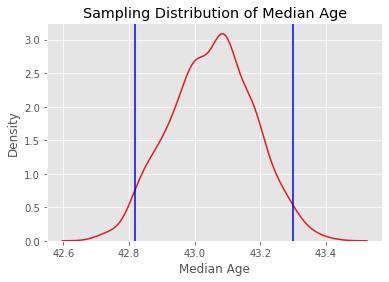

In [542]:
mbs = sns.kdeplot(median_boot_samples)
mbs.set_xlabel('Median Age')
mbs.set_ylabel('Density')
mbs.set_title('Sampling Distribution of Median Age')
for endpoint in conf_int:
    plt.axvline(endpoint, color='blue')

In [511]:
# fix later
# bootstrapping of the default data

print('originial default sample median:', round(np.median(default['AGE']), 2))

default_sample_size = round(len(default) / 10)

default_median_boot_samples = []
for i in range(default_sample_size):
    default_boot_sample = np.random.choice(default['AGE'], default_sample_size)
    default_median_boot_samples.append(np.median(default_boot_sample))
        
print('default boot samples median:', round(np.median(default_median_boot_samples),2))

originial default sample median: 39.13
default boot samples median: 39.12


In [517]:
# bootstrapping of the non_default data

print('originial non-default sample median:', round(np.median(non_default['AGE']), 2))

non_default_sample_size = round(len(non_default) / 10)

non_default_median_boot_samples = []
for i in range(non_default_sample_size):
    non_default_boot_sample = np.random.choice(non_default['AGE'], non_default_sample_size)
    non_default_median_boot_samples.append(np.median(non_default_boot_sample))
        
print('non-default boot samples median:', round(np.median(non_default_median_boot_samples),2))

originial non-default sample median: 43.5
non-default boot samples median: 43.5


Text(0, 0.5, 'Density')

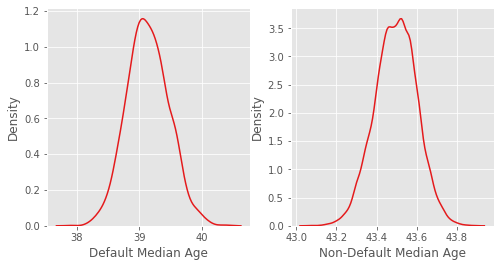

In [532]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))
sns.kdeplot(default_median_boot_samples, ax=ax1)
sns.kdeplot(non_default_median_boot_samples, ax=ax2)
ax1.set_xlabel('Default Median Age')
ax1.set_ylabel('Density')
ax2.set_xlabel('Non-Default Median Age')
ax2.set_ylabel('Density')